# Algoritma Pagerank
Algoritma PageRank adalah algoritma yang digunakan oleh mesin pencari untuk menentukan peringkat halaman web berdasarkan pentingnya halaman-halaman
Algoritme PageRank adalah bagaimana memulai dari masalah yang kompleks dan berakhir dengan solusi yang sangat sederhana. Dalam posting ini, saya akan mengajari Anda ide dan teori di balik algoritma PageRank. Anda hanya perlu memiliki beberapa dasar dalam aljabar dan Rantai Markov. Di sini, kami akan menggunakan peringkat halaman web sebagai kasus penggunaan untuk menggambarkan algoritma PageRank.

**Cara kerja algoritma pagerank(power method)**

1.Representasi Graf:

Web direpresentasikan sebagai graf berarah, di mana setiap node merepresentasikan halaman web, dan setiap edge merepresentasikan link dari satu halaman ke halaman lainnya.




**Hitung matriks berikut**

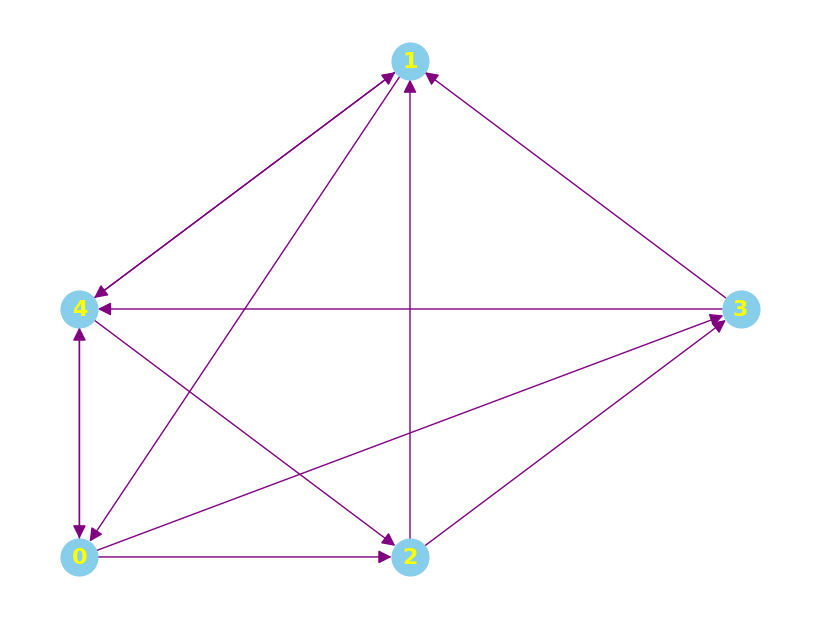

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graf terarah
G = nx.DiGraph()

# Menambahkan simpul (node)
nodes = [0, 1, 2, 3, 4]
G.add_nodes_from(nodes)

# Menambahkan tepi (edges) sesuai dengan gambar
edges = [
    (0, 3), (0, 2), (0, 4),
    (1, 0), (2, 1), (3, 1), (1, 4),
    (2, 3), (4, 2),
    (3, 4),
    (4, 0), (4, 1)
]

G.add_edges_from(edges)

# Menentukan posisi node secara manual agar lebih mirip dengan gambar
pos = {
    0: (0, 0),
    1: (1, 2),
    2: (1, 0),
    3: (2, 1),
    4: (0, 1)
}

# Menggambar graf
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=16, font_color="yellow", font_weight="bold", edge_color="purple", arrowsize=20, arrowstyle='-|>')
plt.show()




$$
A = \begin{bmatrix}
    0 & 0 & 0 & 0 & 1/3 \\
    0 & 0 & 1/2 & 1 & 1/3 \\
    1/3 & 0 & 0 & 0 & 1/3 \\
    1/3 & 0 & 1/2 & 0 & 0 \\
    1/3 & 1 & 0 & 0 & 0 \\
\end{bmatrix}
$$

$$
V0 = \begin{bmatrix}
    0.2 \\ 
    0.2 \\ 
    0.2 \\
    0.2 \\ 
    0.2 \\
\end{bmatrix}
$$

$$
\begin{aligned}
& \mathrm{V} 1= \\
& \text { [ [0.06666667] } \\
& \text { [0.36666667] } \\
& \text { [0.13333333] } \\
& \text { [0.16666667] } \\
& \text { [0.26666667]] } \\
& \mathrm{V} 2= \\
& \text { [ [0.08888889] } \\
& \text { [0.32222222] } \\
& \text { [0.11111111] } \\
& \text { [0.08888889] } \\
& \text { [0.38888889]] } \\
& \mathrm{V} 3= \\
& \text { [[0.12962963] } \\
& \text { [0.27407407] } \\
& \text { [0.15925926] } \\
& \text { [0.08518519] } \\
& \text { [0.35185185]] } \\
& \mathrm{V} 4= \\
& \text { [ [0.11728395] } \\
& \text { [0.28209877] } \\
& \text { [0.16049383] } \\
& \text { [0.12283951] } \\
& \text { [0.31728395]] } \\
& \mathrm{V} 5 \\
& \text { [0.30884774] } \\
& \text { [0.14485597] } \\
& \text { [0.11934156] } \\
& [0.32119342]] \\
&
\end{aligned}
$$


$ V_1 = (0.10576132 - 0.11728395)^2 $

$ V_2 = (0.30884774 - 0.28209877)^2 $

$ V_3 = (0.14485597 - 0.16049383)^2 $

$ V_4 = (0.11934156 - 0.12283951)^2 $

$ V_5 = (0.32119342 - 0.31728395)^2 $

$ V = V_1 + V_2 + V_3 + V_4 + V_5 $
$ V = 0.0011203406734407993 $

**contoh mencari pagerank dengan code**

In [2]:
# Perhitungan Menggunakan Perulangan
import numpy as np

A = np.array([[0, 0, 0, 0, 1/3],[0, 0, 1/2, 1, 1/3],[1/3, 0, 0, 0, 1/3],[1/3, 0, 1/2, 0, 0],[1/3, 1, 0, 0, 0]])
V = np.array([1/5, 1/5, 1/5, 1/5, 1/5])

def perkalianMatrix(A, V, conv=0.01, itr=0):
    A_ = A.dot(V)
    if np.linalg.norm(A_ - V) < conv:
        return A_, itr
    else:
        return perkalianMatrix(A, A_, conv, itr+1)

hasil, itr = perkalianMatrix(A, V)
print("hasil konvargen = ", hasil)
terurut = sorted(range(len(hasil)), reverse=True)
print("jumlah iterasi = ", itr)
print("Nilai PageRank yang diurutkan:")
for idx in terurut:
    print(f"Halaman {idx}: PageRank = {hasil[idx]}")

hasil konvargen =  [0.11150739 0.293549   0.14974089 0.11342783 0.33177488]
jumlah iterasi =  7
Nilai PageRank yang diurutkan:
Halaman 4: PageRank = 0.3317748818777625
Halaman 3: PageRank = 0.11342783112330437
Halaman 2: PageRank = 0.149740893156531
Halaman 1: PageRank = 0.29354900167657366
Halaman 0: PageRank = 0.11150739216582836
